# Codveda — Exploratory Data Analysis (EDA)
**Author:** Esraa Elsayed Salama 
**Internship Role:** Data Analysis Intern at Codveda Technologies  
**Dataset:** `iris_dataset.csv`  
**Objective:** Perform EDA: summary stats, visualizations, and correlations.

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
os.makedirs("../outputs/figures", exist_ok=True) 


In [7]:
DATA_PATH = "../data/iris_dataset.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())
df.info()

Shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
# Numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

# Summary stats
summary = df[num_cols].describe().T
summary["mode"] = df[num_cols].mode().iloc[0]
display(summary)

summary.to_csv("../outputs/summary_stats.csv")
print("✅ Saved file: outputs/summary_stats.csv")

Numeric columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']


,count,mean,std,min,25%,50%,75%,max,mode
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,5.0
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4,3.0
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9,1.4
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5,0.2
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0,0.0


✅ Saved file: outputs/summary_stats.csv


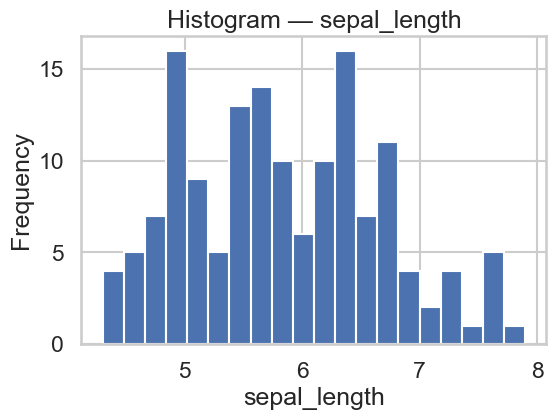

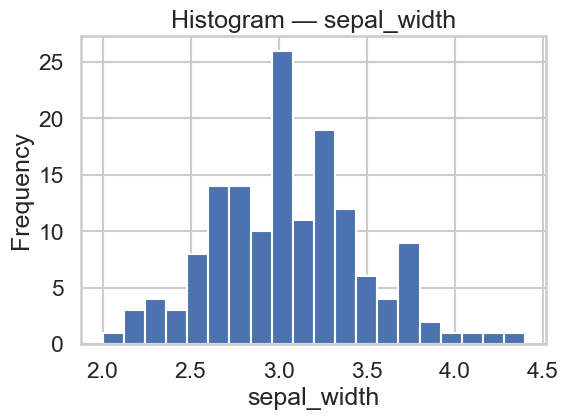

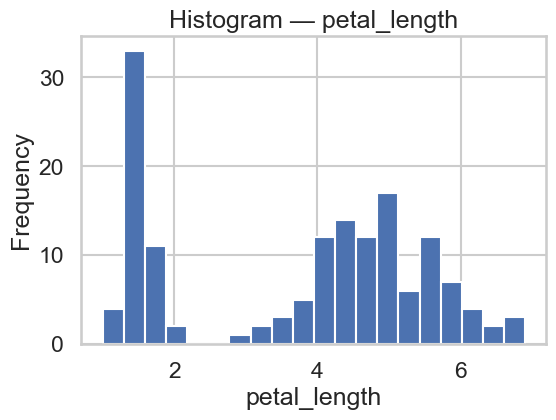

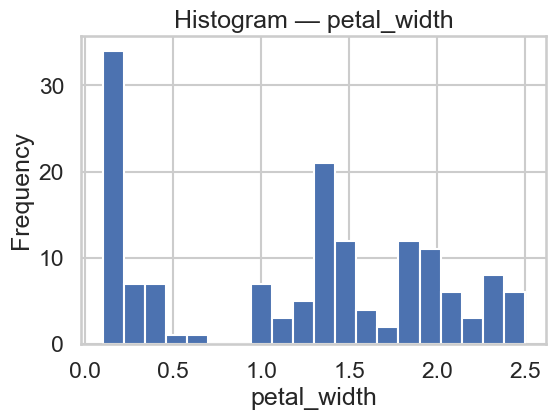

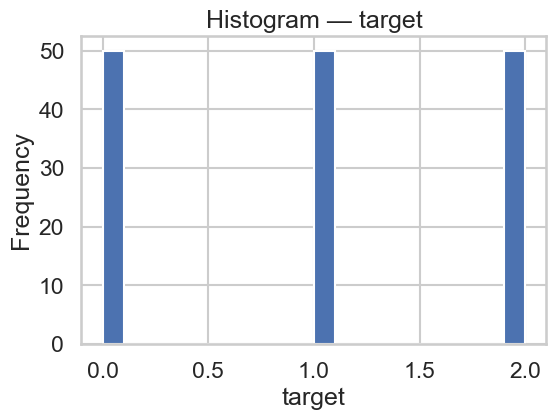

In [9]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=20)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f"../outputs/figures/hist_{col}.png", dpi=150)
    plt.show()

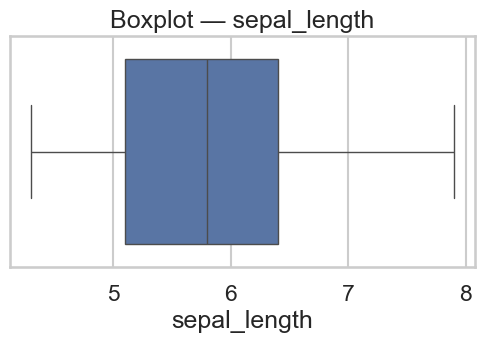

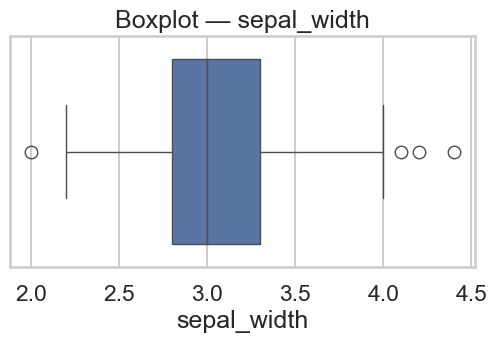

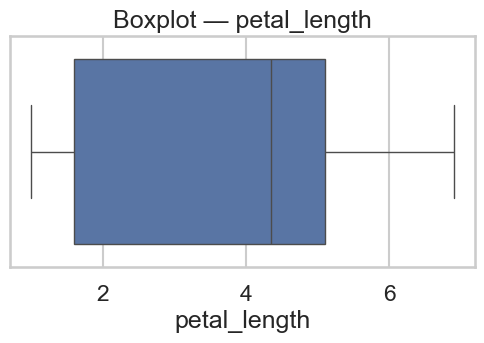

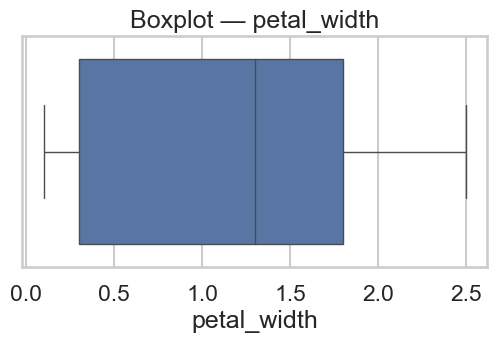

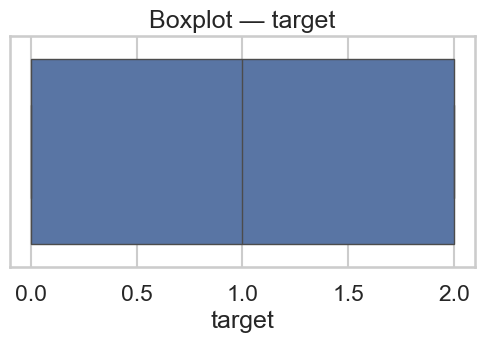

In [10]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot — {col}")
    plt.savefig(f"../outputs/figures/box_{col}.png", dpi=150)
    plt.show()


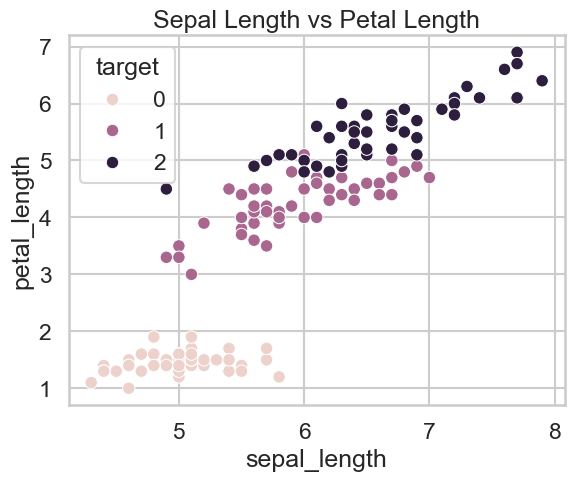

In [11]:
sns.scatterplot(x=df["sepal_length"], y=df["petal_length"], hue=df["target"])
plt.title("Sepal Length vs Petal Length")
plt.savefig("../outputs/figures/scatter_sepal_vs_petal.png", dpi=150)
plt.show()

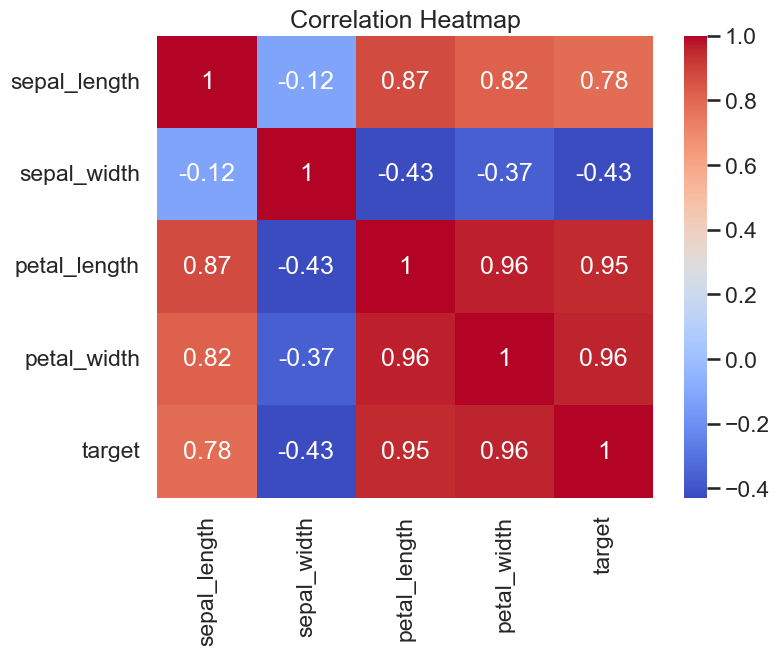

In [12]:
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("../outputs/figures/corr_heatmap.png", dpi=150)
plt.show()


## Findings & Conclusion

- Dataset has 150 rows × 5 columns.  
- Numeric columns: sepal_length, sepal_width, petal_length, petal_width.  
- Summary stats show petal_length and petal_width vary more across species.  
- Histograms: sepal_length is roughly normal, petal_length shows distinct groups.  
- Correlation: petal_length & petal_width strongly correlated (~0.96).  
- Outliers: sepal_width has mild outliers.  

**Next steps:**  
- Use these features for predictive modelling.  
- Consider reducing correlated features for models like regression.  
